1/1 [==============================] - 0s 47ms/step
Epoch 1/50
1/1 [==============================] - 4s 4s/step - loss: 0.0155
Epoch 2/50
1/1 [==============================] - 0s 16ms/step - loss: 0.0142
Epoch 3/50
1/1 [==============================] - 0s 16ms/step - loss: 0.0129
Epoch 4/50
1/1 [==============================] - 0s 16ms/step - loss: 0.0118
Epoch 5/50
1/1 [==============================] - 0s 19ms/step - loss: 0.0107
Epoch 6/50
1/1 [==============================] - 0s 15ms/step - loss: 0.0097
Epoch 7/50
1/1 [==============================] - 0s 16ms/step - loss: 0.0088
Epoch 8/50
1/1 [==============================] - 0s 16ms/step - loss: 0.0080
Epoch 9/50
1/1 [==============================] - 0s 16ms/step - loss: 0.0074
Epoch 10/50
1/1 [==============================] - 0s 14ms/step - loss: 0.0068
Epoch 11/50
1/1 [==============================] - 0s 16ms/step - loss: 0.0064
Epoch 12/50
1/1 [==============================] - 0s 17ms/step - loss: 0.0062
Epoch 13/50

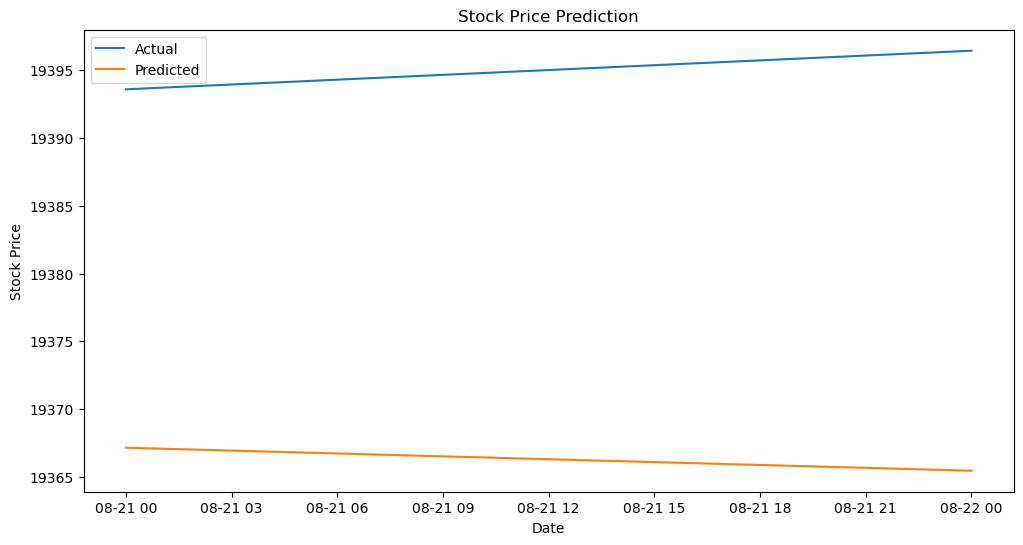

Epoch 1/50
1/1 [==============================] - 0s 24ms/step - loss: 0.0043
Epoch 2/50
1/1 [==============================] - 0s 17ms/step - loss: 0.0043
Epoch 3/50
1/1 [==============================] - 0s 8ms/step - loss: 0.0042
Epoch 4/50
1/1 [==============================] - 0s 16ms/step - loss: 0.0042
Epoch 5/50
1/1 [==============================] - 0s 16ms/step - loss: 0.0041
Epoch 6/50
1/1 [==============================] - 0s 14ms/step - loss: 0.0041
Epoch 7/50
1/1 [==============================] - 0s 17ms/step - loss: 0.0041
Epoch 8/50
1/1 [==============================] - 0s 19ms/step - loss: 0.0040
Epoch 9/50
1/1 [==============================] - 0s 17ms/step - loss: 0.0040
Epoch 10/50
1/1 [==============================] - 0s 14ms/step - loss: 0.0039
Epoch 11/50
1/1 [==============================] - 0s 13ms/step - loss: 0.0039
Epoch 12/50
1/1 [==============================] - 0s 12ms/step - loss: 0.0038
Epoch 13/50
1/1 [==============================] - 0s 16ms/ste

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load historical stock price data into a Pandas DataFrame
data = pd.read_csv('nifty50_dataset.csv')

# Assuming your data has a 'Date' column and a 'Close' column
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Extract the 'Close' prices and normalize them
scaler = MinMaxScaler()
data['Close*'] = scaler.fit_transform(data['Close*'].values.reshape(-1, 1))

# Define a function to create sequences of data
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(X), np.array(y)

# Set sequence length and split data into training and testing sets
sequence_length = 10
X, y = create_sequences(data['Close*'].values, sequence_length)



train_size = int(0.8 * len(X))
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]
# Make predictions on the test set
y_pred = model.predict(X_test)

# Inverse transform the predictions
y_pred_original = scaler.inverse_transform(y_pred)

# Reshape y_test to a 2D array
y_test = y_test.reshape(-1, 1)

# Inverse transform y_test
y_test_original = scaler.inverse_transform(y_test)

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Evaluate the model on the test set
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')

# Make predictions on the test set
y_pred = model.predict(X_test)

# Inverse transform the predictions and actual values
y_pred_original = scaler.inverse_transform(y_pred)
y_test_original = scaler.inverse_transform(y_test)

# Calculate and print the Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test_original, y_pred_original)
print(f'Mean Absolute Error (MAE): {mae}')

# Calculate and print the Mean Squared Error (MSE)
mse = mean_squared_error(y_test_original, y_pred_original)
print(f'Mean Squared Error (MSE): {mse}')

# Plot the actual vs. predicted stock prices
plt.figure(figsize=(12, 6))
plt.plot(data.index[-len(y_test_original):], y_test_original, label='Actual')
plt.plot(data.index[-len(y_test_original):], y_pred_original, label='Predicted')
plt.legend()
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()

history = model.fit(X_train, y_train, epochs=50, batch_size=32)
print("Training loss history:", history.history['loss'])

y_pred_original = scaler.inverse_transform(y_pred)
y_test_original = scaler.inverse_transform(y_test)
print("Actual vs. Predicted Stock Prices:")
print("Actual Prices:", y_test_original)
print("Predicted Prices:", y_pred_original)

